# PCOS EXPLORATORY DATA ANALYSIS AND PREDICTION

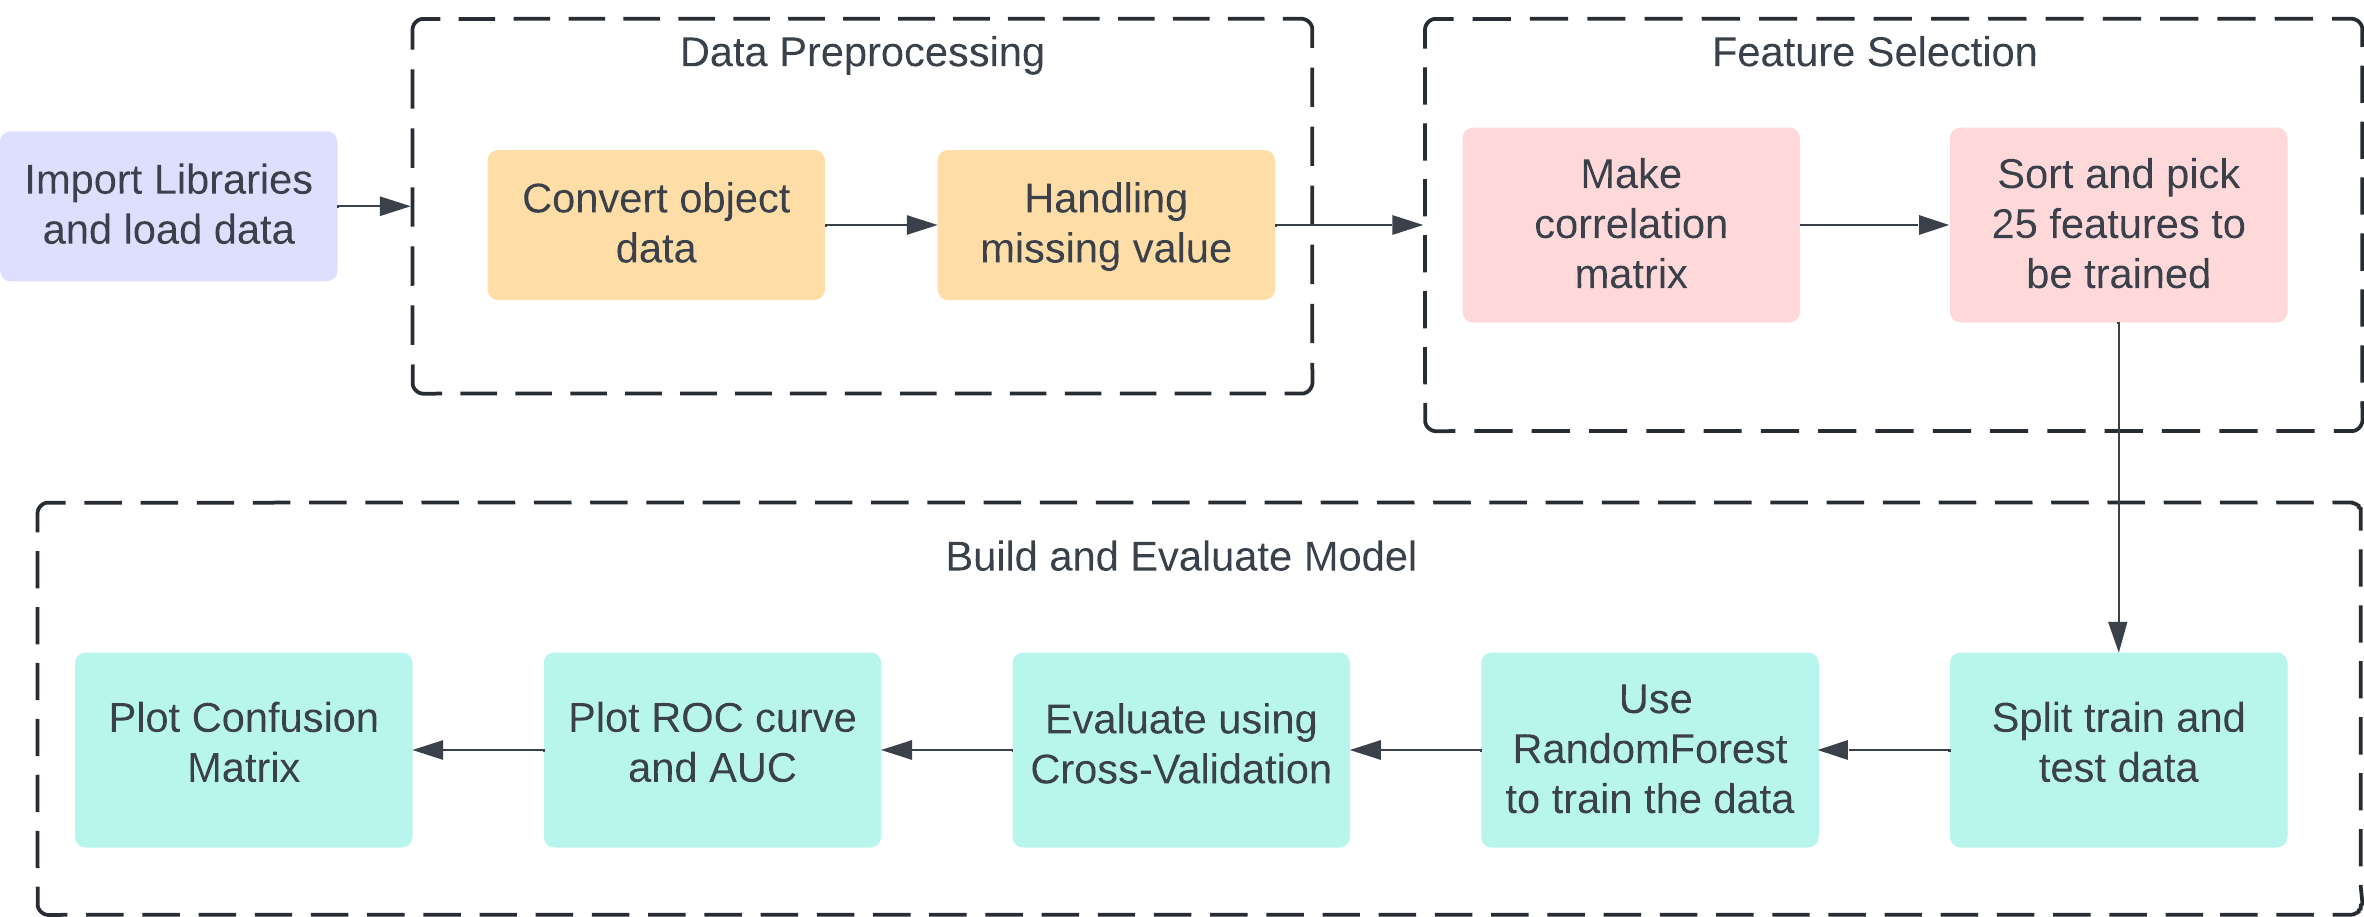

## 1. IMPORT LIBRARIES

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_excel('/kaggle/input/polycystic-ovary-syndrome-pcos/PCOS_data_without_infertility.xlsx', sheet_name = 'Full_new')
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


##  2. DATA PREPROCESSING

in data preprocessing, we will manipulate the data with steps :
1. Converting the object type column to other datatype
2. Handling missing value (delete unecessary column and replace null value in data with median of the data)

### Converting object data 

In [7]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

(541, 45)

There are three columns with object datatype; **II    beta-HCG(mIU/mL)**, **AMH(ng/mL)**, and **Unnamed: 44**, But there are only 2 non-null data for the latter column so we can eliminate the unecessary column by deleting **Unnamed: 44**.

In [8]:
df = df.drop(['Unnamed: 44'], axis =1)

Now let's convert the other two columns to numeric datatype using pandas library **pd.to_numeric**

In [9]:
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors = 'coerce')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors = 'coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

### Handling missing values

Use  **.isnull().any()** to find the columns with missing values, from the dataframe, there are four columns with missing values : **Marraige Status (Yrs), II    beta-HCG(mIU/mL), AMH(ng/mL), Fast food (Y/N).**

In [11]:
# Checking missing values in dataframe
missing_values = df.isnull().any()
# Search for the name of the columns with the missing value
columns_with_missing = missing_values[missing_values].index
# Print columns with missing values 
for col in columns_with_missing:
    print(format(col))

Marraige Status (Yrs)
II    beta-HCG(mIU/mL)
AMH(ng/mL)
Fast food (Y/N)


We can use several methods for replacing the missing value, but for this dataset, i will replace the null values with the median of the data

In [12]:
for col in columns_with_missing:
   
    median_value = df[col].median()
    # Replace missing values with the median
    df[col].fillna(median_value, inplace=True)

/tmp/ipykernel_33/3240733963.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
/tmp/ipykernel_33/3240733963.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [13]:
# Checking missing values in dataframe
missing_values = df.isnull().any()
# Search for the name of the columns with the missing value
columns_with_missing = missing_values[missing_values].index
# Print columns with missing values and replace the missing value with the median of the data
for col in columns_with_missing:
    print(format(col))

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   541 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [15]:
df.isnull().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

## 3. FEATURE SELECTION

Feature selection is the step where we consider which data has the most relevant to each other and contirbute the most to the predictive model. We have 43 columns in this dataframe and we will pick 25 columns only and eliminate the other. This step is important to select the right data/column to be trained for the machine learning model

Steps involved in feature selection :
* Search the correlation between columns
* Sort the correlation score
* Pick 15 largest from top and 10 smallest from bottom

### Correlation matrix

Correlation matrix visualize the correlation between the data. The correlation score range between 1 and -1, the most related data will have score either close to 1 or -1 and the score near 0 is the data with less relevant

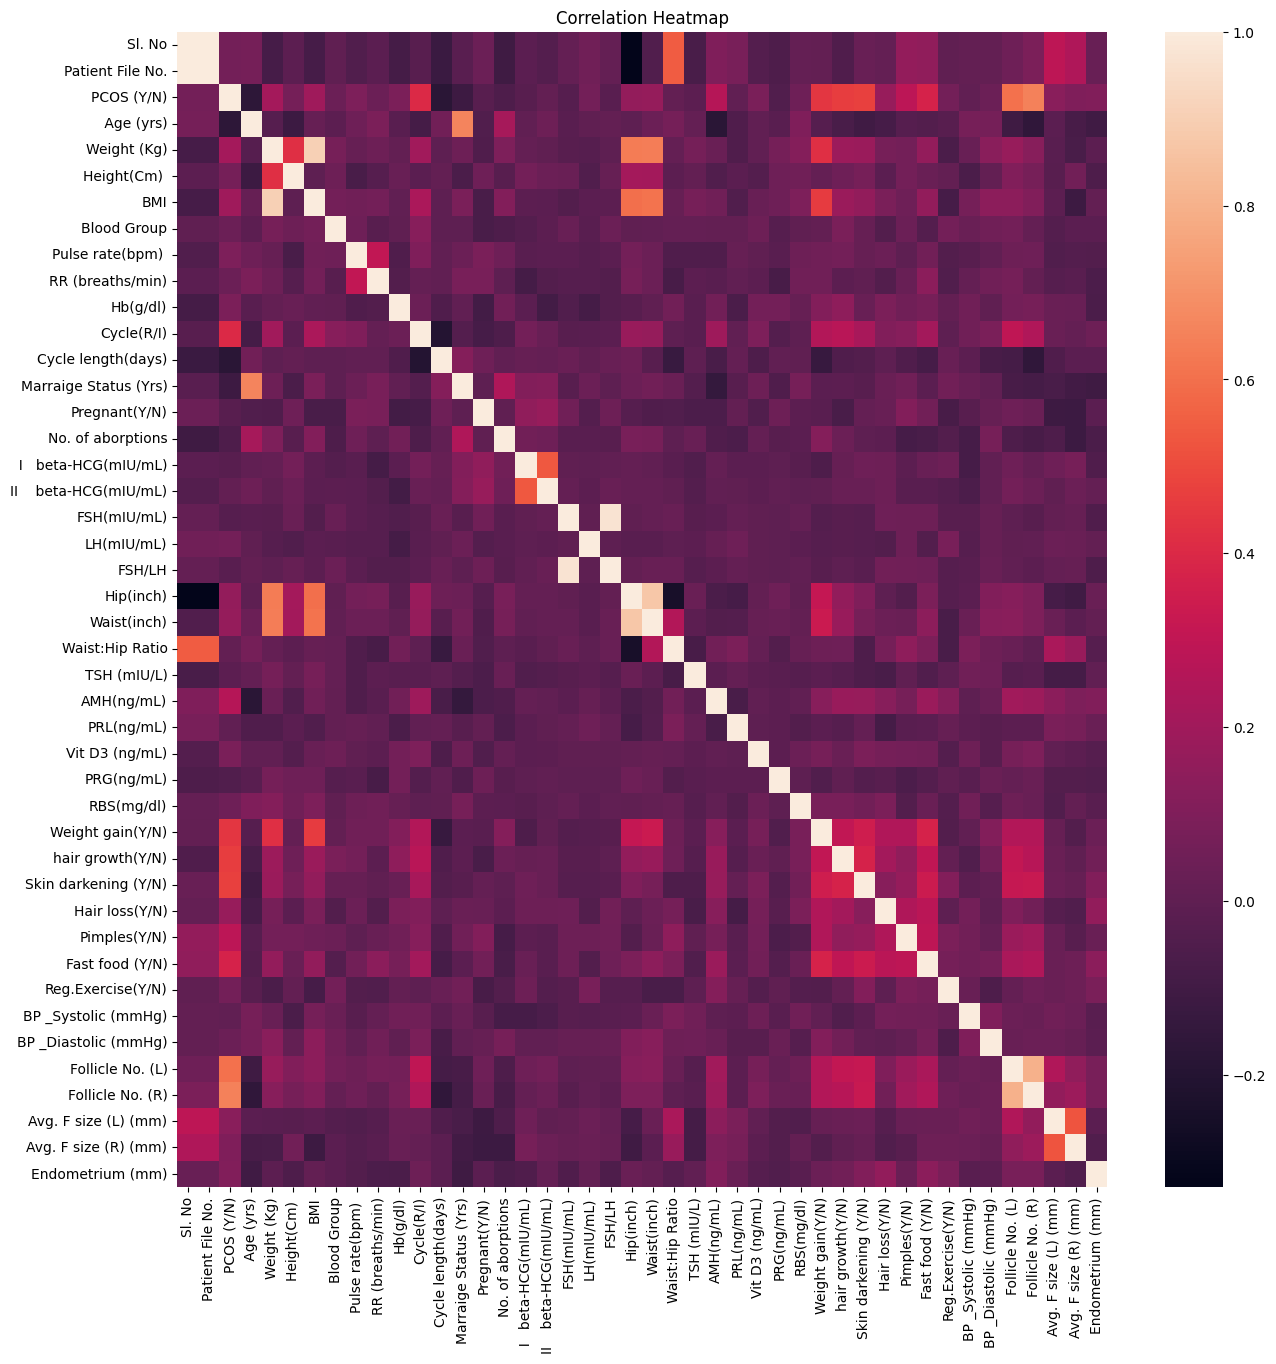

In [16]:
correlation_matrix = df.corr()
sns.set_palette("Set2")
# Plot heatmap to visualize correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Sort the correlation value
Lets sort the value that has the most related value with the target ('PCOS (Y/N)')


In [17]:
 correlation_matrix.corr()['PCOS (Y/N)'].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.891913
Follicle No. (L)          0.876219
Skin darkening (Y/N)      0.794116
hair growth(Y/N)          0.767514
Cycle(R/I)                0.711097
Weight gain(Y/N)          0.697302
Fast food (Y/N)           0.669276
AMH(ng/mL)                0.522210
Pimples(Y/N)              0.479806
Hair loss(Y/N)            0.343444
BMI                       0.304344
Weight (Kg)               0.303534
Endometrium (mm)          0.241419
Hip(inch)                 0.236160
Waist(inch)               0.225146
Hb(g/dl)                  0.172612
Avg. F size (L) (mm)      0.172456
Vit D3 (ng/mL)            0.147638
Avg. F size (R) (mm)      0.111115
Height(Cm)                0.109125
Pulse rate(bpm)           0.071814
Reg.Exercise(Y/N)         0.050908
Blood Group               0.028253
BP _Diastolic (mmHg)      0.007669
RBS(mg/dl)                0.007615
RR (breaths/min)          0.005309
Sl. No                   -0.013939
Patient File No.    

### Pick 25 Columns

In [18]:
highest_correlation = correlation_matrix.nlargest(15, "PCOS (Y/N)")["PCOS (Y/N)"].index
lowest_correlation = correlation_matrix.nsmallest(10, "PCOS (Y/N)")["PCOS (Y/N)"].index
correlation = highest_correlation.append(lowest_correlation)

print(correlation)

Index(['PCOS (Y/N)', 'Follicle No. (R)', 'Follicle No. (L)',
       'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)',
       'Cycle(R/I)', 'Fast food (Y/N)', 'Pimples(Y/N)', 'AMH(ng/mL)',
       'Weight (Kg)', 'BMI', 'Hair loss(Y/N)', 'Waist(inch)', 'Hip(inch)',
       'Cycle length(days)', ' Age (yrs)', 'Marraige Status (Yrs)',
       'No. of aborptions', 'PRG(ng/mL)', 'FSH(mIU/mL)',
       '  I   beta-HCG(mIU/mL)', 'Pregnant(Y/N)', 'FSH/LH', 'TSH (mIU/L)'],
      dtype='object')


In [19]:
df = df[correlation]
print(df.shape)
df.head()

(541, 25)


,PCOS (Y/N),Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Fast food (Y/N),Pimples(Y/N),AMH(ng/mL),...,Cycle length(days),Age (yrs),Marraige Status (Yrs),No. of aborptions,PRG(ng/mL),FSH(mIU/mL),I beta-HCG(mIU/mL),Pregnant(Y/N),FSH/LH,TSH (mIU/L)
0,0,3,3,0,0,0,2,1.0,0,2.07,...,5,28,7.0,0,0.57,7.95,1.99,0,2.160326,0.68
1,0,5,3,0,0,0,2,0.0,0,1.53,...,5,36,11.0,0,0.97,6.73,60.80,1,6.174312,3.16
2,1,15,13,0,0,0,2,1.0,1,6.63,...,5,33,10.0,0,0.36,5.54,494.08,1,6.295455,2.54
3,0,2,2,0,0,0,2,0.0,0,1.22,...,5,37,4.0,0,0.36,8.06,1.99,0,3.415254,16.41
4,0,4,3,0,0,0,2,0.0,0,2.26,...,5,25,1.0,0,0.38,3.98,801.45,1,4.422222,3.57


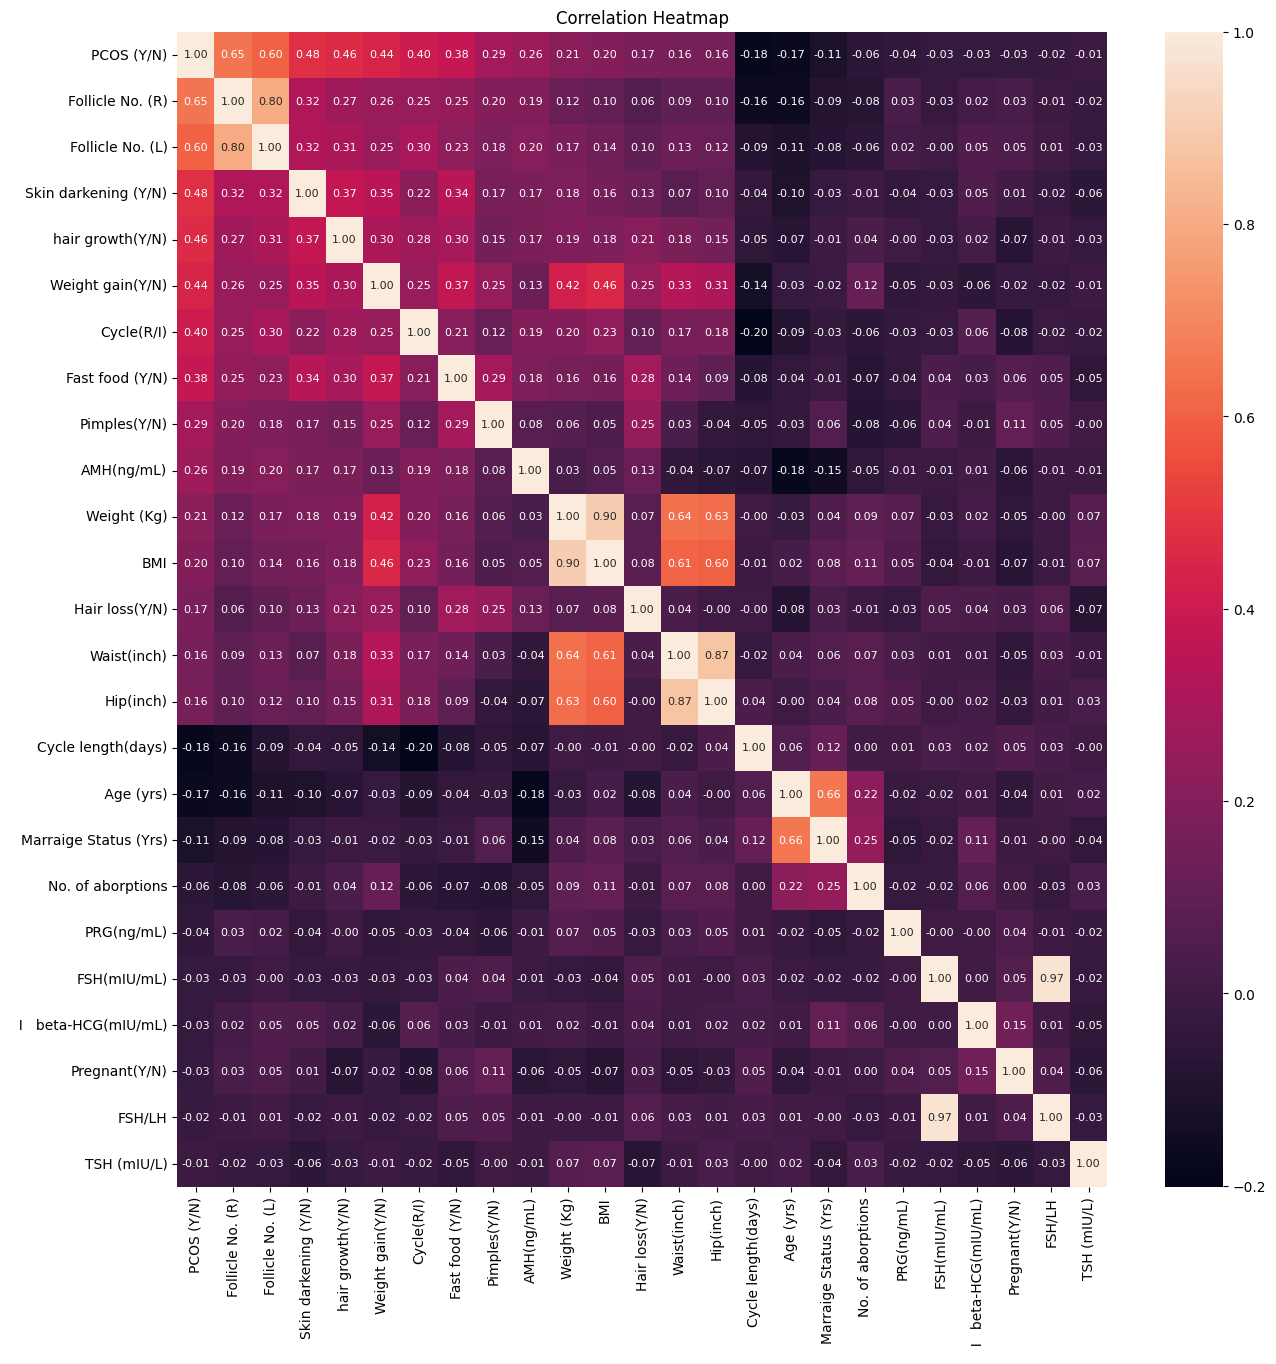

In [20]:
correlation_matrix = df.corr()
sns.set_palette("Set1")
# Plot heatmap to visualize correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot = True, fmt= ".2f", annot_kws={"fontsize": 8})
plt.title("Correlation Heatmap")
plt.show()

## 4. DATA VISUALIZATION


For the data Visualization, i will only visualize the boxplot to compare the difference between someone who is diagnosed with PCOS (labelled with 1) and the normal (labelled with 0)

> The comparison of BMI in PCOS vs Normal

<Axes: xlabel='PCOS (Y/N)', ylabel='BMI'>

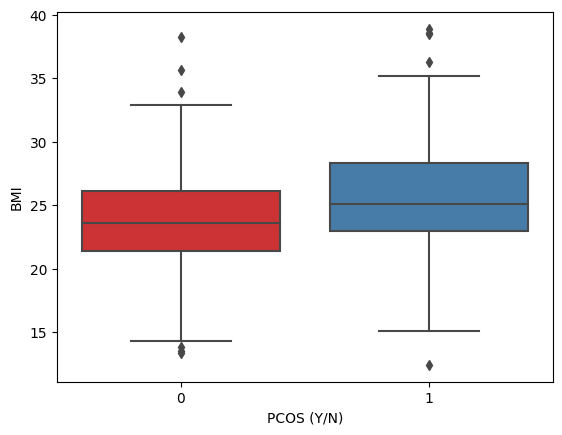

In [21]:
sns.set_palette("Set1")
sns.boxplot(y='BMI', x="PCOS (Y/N)", data=df)

> The Comparison of the Follicel Number in PCOS vs Normal

<Axes: xlabel='PCOS (Y/N)', ylabel='Follicle No. (R)'>

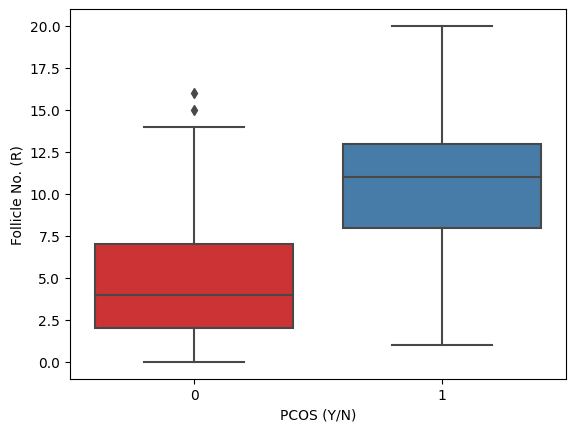

In [22]:
sns.set_palette("Set1")
sns.boxplot(y='Follicle No. (R)', x="PCOS (Y/N)", data=df)

<Axes: xlabel='PCOS (Y/N)', ylabel='Follicle No. (L)'>

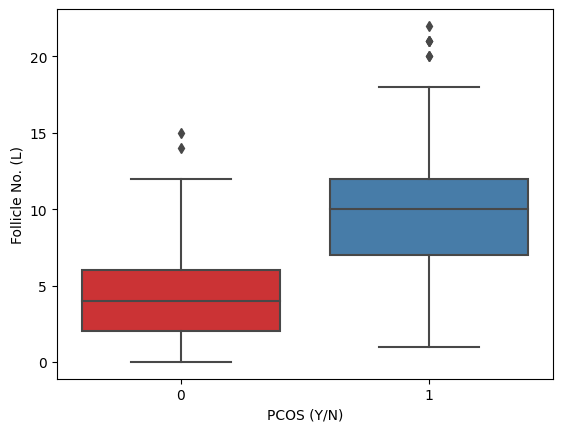

In [23]:
sns.set_palette("Set1")
sns.boxplot(y='Follicle No. (L)', x="PCOS (Y/N)", data=df)

> The Comparison of Cycle length (Days) in PCOS vs Normal

<Axes: xlabel='PCOS (Y/N)', ylabel='Cycle length(days)'>

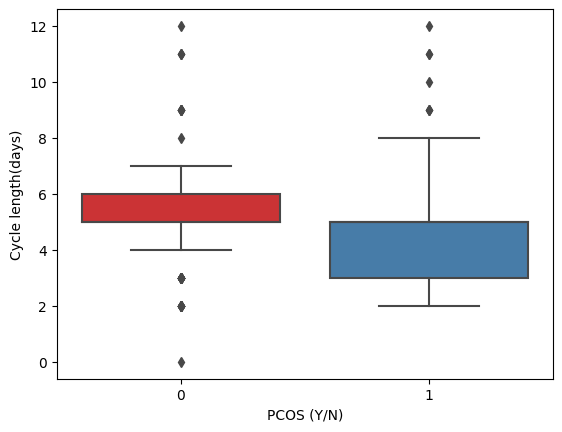

In [24]:
# Length of menstrual phase in PCOS vs normal 
sns.set_palette("Set1")
sns.boxplot(y='Cycle length(days)', x="PCOS (Y/N)", data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


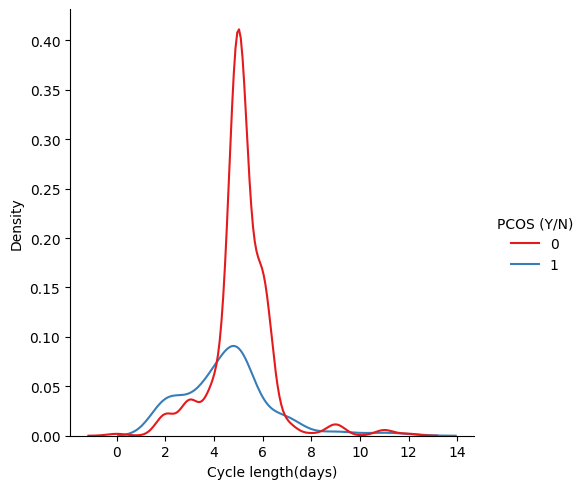

In [25]:
sns.set_palette("Set1")
sns.displot(x='Cycle length(days)', hue="PCOS (Y/N)", data=df, kind= "kde")

In [26]:
df.head()

,PCOS (Y/N),Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Fast food (Y/N),Pimples(Y/N),AMH(ng/mL),...,Cycle length(days),Age (yrs),Marraige Status (Yrs),No. of aborptions,PRG(ng/mL),FSH(mIU/mL),I beta-HCG(mIU/mL),Pregnant(Y/N),FSH/LH,TSH (mIU/L)
0,0,3,3,0,0,0,2,1.0,0,2.07,...,5,28,7.0,0,0.57,7.95,1.99,0,2.160326,0.68
1,0,5,3,0,0,0,2,0.0,0,1.53,...,5,36,11.0,0,0.97,6.73,60.80,1,6.174312,3.16
2,1,15,13,0,0,0,2,1.0,1,6.63,...,5,33,10.0,0,0.36,5.54,494.08,1,6.295455,2.54
3,0,2,2,0,0,0,2,0.0,0,1.22,...,5,37,4.0,0,0.36,8.06,1.99,0,3.415254,16.41
4,0,4,3,0,0,0,2,0.0,0,2.26,...,5,25,1.0,0,0.38,3.98,801.45,1,4.422222,3.57


## 5. MODEL USING SCIKIT LEARN

Choosing the right model for our prediction model is important step before training the data. With the help of `sklearn map` we could easily choose the algorithm for our dataset and based on the map, we could choose between Linear SVC, KNeighbors Classifier, SVC, and Ensemble Classifiers. We will train the selected data to predict or diagnosed whether someone has a big probability to have PCOS.

Steps involved in model building
1. Split train and test dataset
2. Use ensemble cassifiers (RandomForest)
3. Evaluate the accuracy using cross-valdiation method
4. Evaluate using ROC and see the Area Under Curve (AUC)
5. Plot the confussion matrix

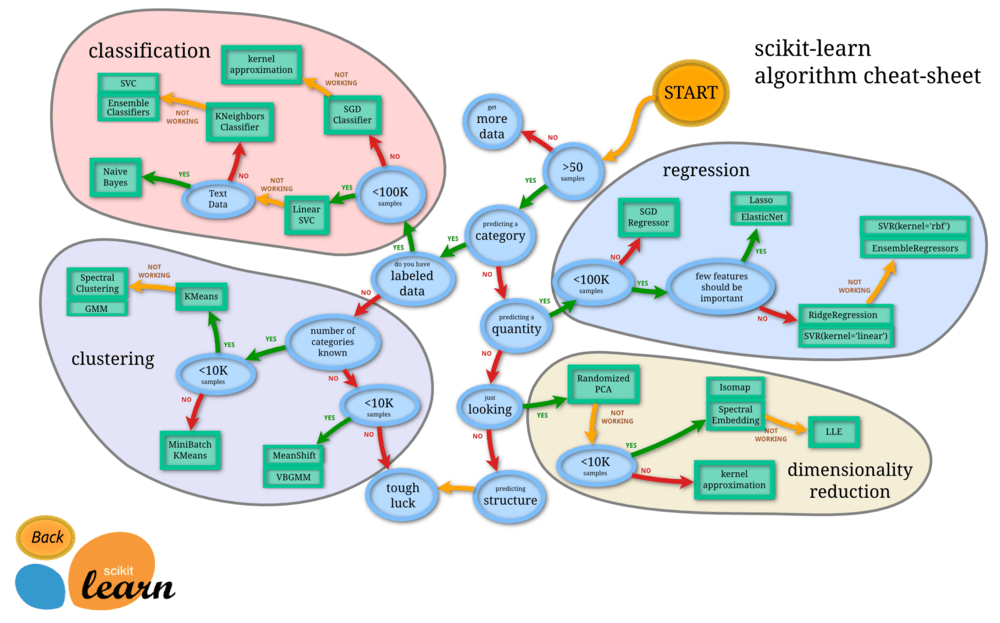

### Split the Dataset and Train the test data

In [27]:
np.random.seed(42)

#Set X and Y
X = df.drop("PCOS (Y/N)", axis = 1)
y = df["PCOS (Y/N)"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X,y)
clf.score(X_test, y_test)

1.0

### Evaluate using Cross-Validation

Cross validation is testing the model in the different range of data based on how many cross validation (cv) we set. Here i test the model in the `5` range of data and calculate the average accuracy

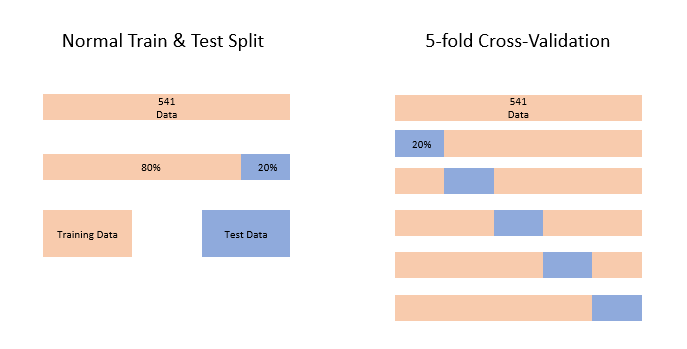

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=5)

#take the mean pf 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))
print(f"the accuracy of the model : {clf_cross_val_score}")

the accuracy of the model : 0.8853380903839619


### Evaluate using ROC curve and measure AUC

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

#Make predictions with proba (probability)
y_probs = clf.predict_proba(X_test)

#Take only for the probability of data that has been classiefied in positive (1)
y_probs_positive = y_probs[:, 1]

In [30]:
fpr, tpr, treshold = roc_curve(y_test, y_probs_positive)

In [31]:
def plot_the_roc_curve(fpr, tpr):
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

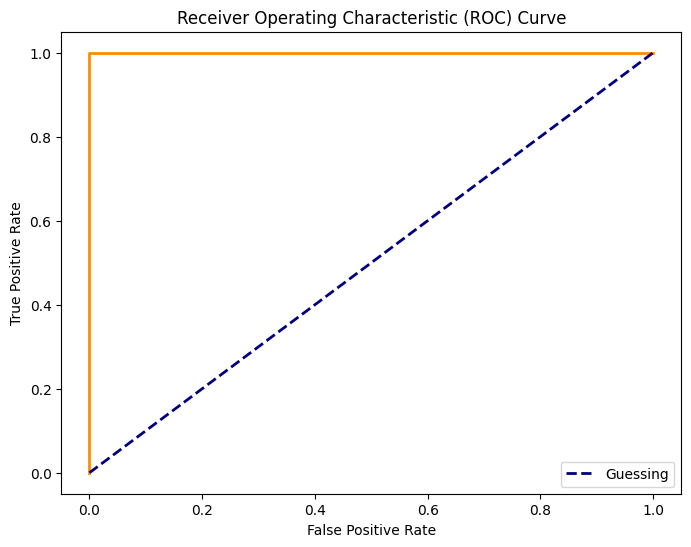

In [32]:
plot_the_roc_curve(fpr, tpr)

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

1.0

### Confusion Matrix

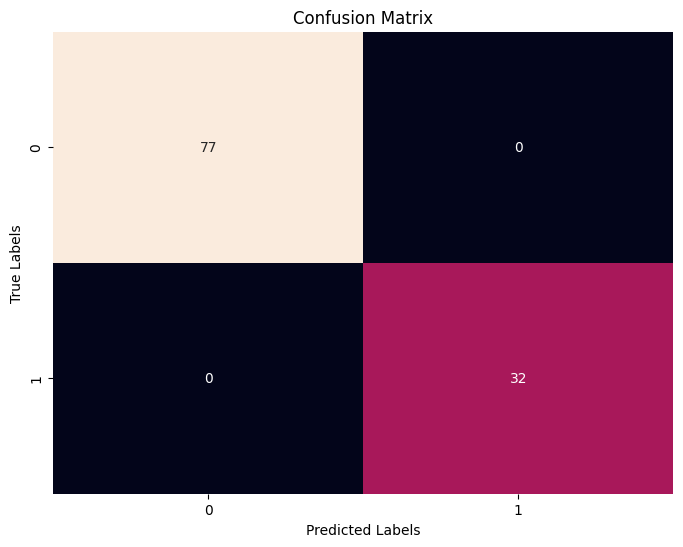

In [34]:
from sklearn.metrics import confusion_matrix
# Generate confusion matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.set_palette("Set1")
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        32

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109

